In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 129us/step - loss: 0.3732 - val_loss: 0.2732
Epoch 2/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.2662 - val_loss: 0.2559
Epoch 3/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.2454 - val_loss: 0.2327
Epoch 4/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.2247 - val_loss: 0.2143
Epoch 5/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.2091 - val_loss: 0.2011
Epoch 6/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.1975 - val_loss: 0.1913
Epoch 7/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.1889 - val_loss: 0.1837
Epoch 8/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.1821 - val_loss: 0.1775
Epoch 9/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.1764 - val_loss: 0.172

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

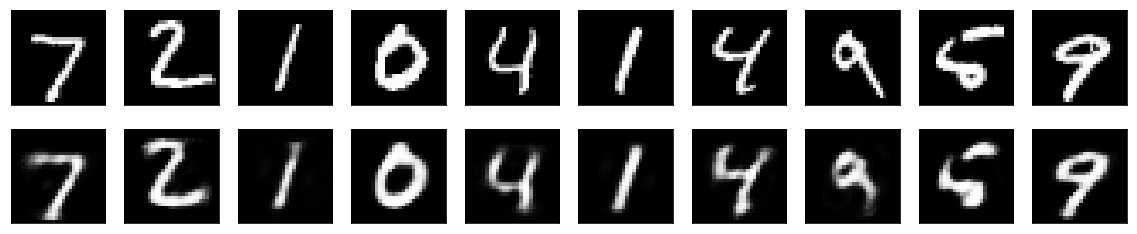

In [13]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [15]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [16]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 158us/step - loss: 0.3326 - val_loss: 0.2637
Epoch 2/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.2583 - val_loss: 0.2512
Epoch 3/100
60000/60000 [==============================] - 9s 157us/step - loss: 0.2449 - val_loss: 0.2377
Epoch 4/100
60000/60000 [==============================] - 10s 165us/step - loss: 0.2299 - val_loss: 0.2212
Epoch 5/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.2165 - val_loss: 0.2087
Epoch 6/100
60000/60000 [==============================] - 9s 155us/step - loss: 0.2032 - val_loss: 0.1950
Epoch 7/100
60000/60000 [==============================] - 9s 157us/step - loss: 0.1901 - val_loss: 0.1835ETA: 0s - loss: 0.19
Epoch 8/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.1818 - val_loss: 0.1771
Epoch 9/100
60000/60000 [==============================] - 8s 128us/step

In [17]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [18]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [19]:
tensorboard --logdir=/tmp/autoencoder

SyntaxError: invalid syntax (<ipython-input-19-0a594c9e65fa>, line 1)

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 153s 3ms/step - loss: 0.2434 - val_loss: 0.1872
Epoch 2/50
60000/60000 [==============================] - 144s 2ms/step - loss: 0.1725 - val_loss: 0.1606
Epoch 3/50
60000/60000 [==============================] - 148s 2ms/step - loss: 0.1546 - val_loss: 0.1537
Epoch 4/50
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1450 - val_loss: 0.1421
Epoch 5/50
60000/60000 [==============================] - 132s 2ms/step - loss: 0.1385 - val_loss: 0.1350
Epoch 6/50
60000/60000 [==============================] - 135s 2ms/step - loss: 0.1336 - val_loss: 0.1321
Epoch 7/50
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1298 - val_loss: 0.1276
Epoch 8/50
60000/60000 [==============================] - 146s 2ms/step - loss: 0.1274 - val_loss: 0.1244
Epoch 9/50
60000/60000 [==============================] - 140s 2ms/step - loss: 0.1250 - val_loss: 0.1

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


In [4]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ValueError: num must be 1 <= num <= 20, not 0

In [6]:
import tensorflow as tf
import numpy as np
import math
from libs.activations import lrelu
from libs.utils import corrupt


# %%
def autoencoder(input_shape=[None, 784],
                n_filters=[1, 10, 10, 10],
                filter_sizes=[3, 3, 3, 3],
                corruption=False):
    
    # %%
    # input to the network
    x = tf.placeholder(
        tf.float32, input_shape, name='x')


    # %%
    # ensure 2-d is converted to square tensor.
    if len(x.get_shape()) == 2:
        x_dim = np.sqrt(x.get_shape().as_list()[1])
        if x_dim != int(x_dim):
            raise ValueError('Unsupported input dimensions')
        x_dim = int(x_dim)
        x_tensor = tf.reshape(
            x, [-1, x_dim, x_dim, n_filters[0]])
    elif len(x.get_shape()) == 4:
        x_tensor = x
    else:
        raise ValueError('Unsupported input dimensions')
    current_input = x_tensor

    # %%
    # Optionally apply denoising autoencoder
    if corruption:
        current_input = corrupt(current_input)

    # %%
    # Build the encoder
    encoder = []
    shapes = []
    for layer_i, n_output in enumerate(n_filters[1:]):
        n_input = current_input.get_shape().as_list()[3]
        shapes.append(current_input.get_shape().as_list())
        W = tf.Variable(
            tf.random_uniform([
                filter_sizes[layer_i],
                filter_sizes[layer_i],
                n_input, n_output],
                -1.0 / math.sqrt(n_input),
                1.0 / math.sqrt(n_input)))
        b = tf.Variable(tf.zeros([n_output]))
        encoder.append(W)
        output = lrelu(
            tf.add(tf.nn.conv2d(
                current_input, W, strides=[1, 2, 2, 1], padding='SAME'), b))
        current_input = output

    # %%
    # store the latent representation
    z = current_input
    encoder.reverse()
    shapes.reverse()

    # %%
    # Build the decoder using the same weights
    for layer_i, shape in enumerate(shapes):
        W = encoder[layer_i]
        b = tf.Variable(tf.zeros([W.get_shape().as_list()[2]]))
        output = lrelu(tf.add(
            tf.nn.conv2d_transpose(
                current_input, W,
                tf.stack([tf.shape(x)[0], shape[1], shape[2], shape[3]]),
                strides=[1, 2, 2, 1], padding='SAME'), b))
        current_input = output

    # %%
    # now have the reconstruction through the network
    y = current_input
    # cost function measures pixel-wise difference
    cost = tf.reduce_sum(tf.square(y - x_tensor))

    # %%
    return {'x': x, 'z': z, 'y': y, 'cost': cost}


# %%
def test_mnist():
    """Test the convolutional autoencder using MNIST."""
    # %%
    import tensorflow as tf
    import tensorflow.examples.tutorials.mnist.input_data as input_data
    import matplotlib.pyplot as plt

    # %%
    # load MNIST as before
    mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
    mean_img = np.mean(mnist.train.images, axis=0)
    ae = autoencoder()

    # %%
    learning_rate = 0.01
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae['cost'])

    # %%
    # We create a session to use the graph
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    # %%
    # Fit all training data
    batch_size = 100
    n_epochs = 10
    for epoch_i in range(n_epochs):
        for batch_i in range(mnist.train.num_examples // batch_size):
            batch_xs, _ = mnist.train.next_batch(batch_size)
            train = np.array([img - mean_img for img in batch_xs])
            sess.run(optimizer, feed_dict={ae['x']: train})
        print(epoch_i, sess.run(ae['cost'], feed_dict={ae['x']: train}))

    # %%
    # Plot example reconstructions
    n_examples = 10
    test_xs, _ = mnist.test.next_batch(n_examples)
    test_xs_norm = np.array([img - mean_img for img in test_xs])
    recon = sess.run(ae['y'], feed_dict={ae['x']: test_xs_norm})
    print(recon.shape)
    fig, axs = plt.subplots(2, n_examples, figsize=(10, 2))
    for example_i in range(n_examples):
        axs[0][example_i].imshow(
            np.reshape(test_xs[example_i, :], (28, 28)))
        axs[1][example_i].imshow(
            np.reshape(
                np.reshape(recon[example_i, ...], (784,)) + mean_img,
                (28, 28)))
    fig.show()
    plt.draw()
    plt.waitforbuttonpress()

ImportError: No module named 'libs.activations'

In [7]:
"""Tutorial on how to create a convolutional autoencoder w/ Tensorflow.

Parag K. Mital, Jan 2016
"""
# %% imports
%matplotlib inline
import tensorflow as tf
import numpy as np
import math
from libs.activations import lrelu
from libs.utils import corrupt

ImportError: No module named 'libs.activations'

In [8]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [9]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [11]:
import mnist_reader
# train the VAE on MNIST digits
x_train, y_train = mnist_reader.load_mnist('data/mnistformat', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/mnistformat', kind='t10k')
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 12500 samples, validate on 12500 samples
Epoch 1/100
12500/12500 [==============================] - 6s 516us/step - loss: -1038.3771 - val_loss: -1157.2075
Epoch 2/100
12500/12500 [==============================] - 3s 263us/step - loss: -1200.9577 - val_loss: -1225.0751
Epoch 3/100
12500/12500 [==============================] - 3s 235us/step - loss: -1225.0807 - val_loss: -1225.0853
Epoch 4/100
12500/12500 [==============================] - 3s 230us/step - loss: -1225.0873 - val_loss: -1225.0898
Epoch 5/100
12500/12500 [==============================] - 3s 239us/step - loss: -1238.3783 - val_loss: -1248.8510
Epoch 6/100
12500/12500 [==============================] - 3s 215us/step - loss: -1262.2177 - val_loss: -1291.1963
Epoch 7/100
12500/12500 [==============================] - 3s 203us/step - loss: -1295.6852 - val_loss: -1301.5075
Epoch 8/100
12500/12500 [==============================] - 3s 236us/step - loss: -1307.1583 - val_loss: -1316.0100
Epoch 9/100
12500/12500 [=====

In [12]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [15]:

import numpy as np

import mnist_reader
# train the VAE on MNIST digits
x_train, y_train = mnist_reader.load_mnist('data/mnistformat', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/mnistformat', kind='t10k')
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [86]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ValueError: num must be 1 <= num <= 20, not 0

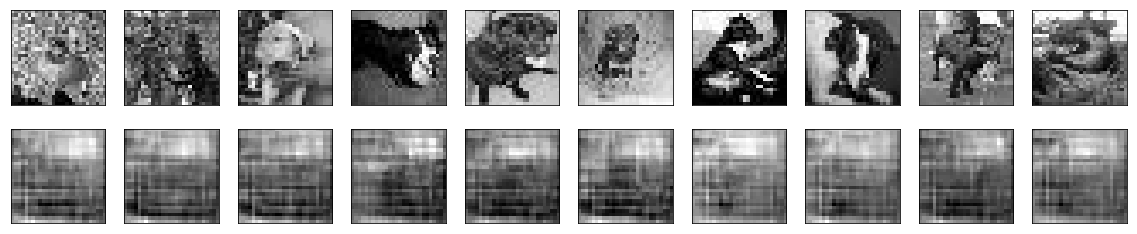

In [17]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [52]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
import mnist_reader
# train the VAE on MNIST digits
x_train, y_train = mnist_reader.load_mnist('data/mnistformat', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/mnistformat', kind='t10k')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print x_train.shape
# print x_test.shape

In [54]:
autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 12500 samples, validate on 12500 samples
Epoch 1/200
12500/12500 [==============================] - 5s 398us/step - loss: 0.6935 - val_loss: 0.6930
Epoch 2/200
12500/12500 [==============================] - 2s 168us/step - loss: 0.6929 - val_loss: 0.6928
Epoch 3/200
12500/12500 [==============================] - 2s 172us/step - loss: 0.6927 - val_loss: 0.6925
Epoch 4/200
12500/12500 [==============================] - 2s 159us/step - loss: 0.6924 - val_loss: 0.6923
Epoch 5/200
12500/12500 [==============================] - 2s 156us/step - loss: 0.6921 - val_loss: 0.6920
Epoch 6/200
12500/12500 [==============================] - 2s 158us/step - loss: 0.6918 - val_loss: 0.6916
Epoch 7/200
12500/12500 [==============================] - 2s 168us/step - loss: 0.6913 - val_loss: 0.6911
Epoch 8/200
12500/12500 [==============================] - 2s 154us/step - loss: 0.6907 - val_loss: 0.6904
Epoch 9/200
12500/12500 [==============================] - 2s 158us/step - loss: 0.6900 - val_

12500/12500 [==============================] - 2s 153us/step - loss: 0.6152 - val_loss: 0.6159
Epoch 152/200
12500/12500 [==============================] - 2s 162us/step - loss: 0.6170 - val_loss: 0.6177
Epoch 153/200
12500/12500 [==============================] - 2s 161us/step - loss: 0.6176 - val_loss: 0.6158
Epoch 154/200
12500/12500 [==============================] - 2s 164us/step - loss: 0.6171 - val_loss: 0.6171
Epoch 155/200
12500/12500 [==============================] - 2s 167us/step - loss: 0.6178 - val_loss: 0.6170
Epoch 156/200
12500/12500 [==============================] - 2s 152us/step - loss: 0.6166 - val_loss: 0.6172
Epoch 157/200
12500/12500 [==============================] - 2s 155us/step - loss: 0.6181 - val_loss: 0.6163
Epoch 158/200
12500/12500 [==============================] - 2s 152us/step - loss: 0.6176 - val_loss: 0.6176
Epoch 159/200
12500/12500 [==============================] - 2s 163us/step - loss: 0.6189 - val_loss: 0.6204
Epoch 160/200
12500/12500 [======

In [28]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

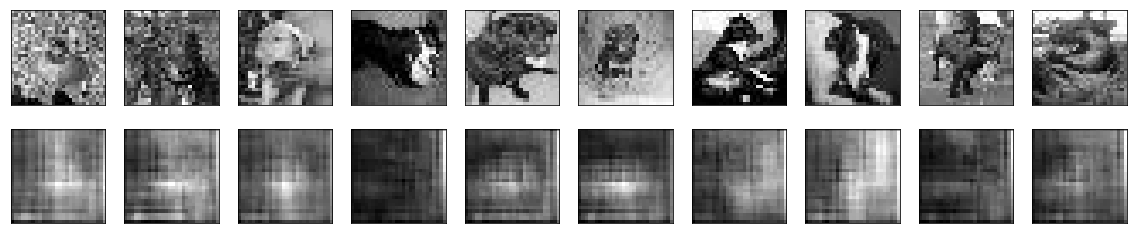

In [55]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# convolution



In [7]:
# train the VAE on MNIST digits
x_train, y_train = mnist_reader.load_mnist('data/mnistformat', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/mnistformat', kind='t10k')
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

NameError: name 'np' is not defined

In [50]:
# train the VAE on MNIST digits
x_train, y_train = mnist_reader.load_mnist('data/mnistformat', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/mnistformat', kind='t10k')
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

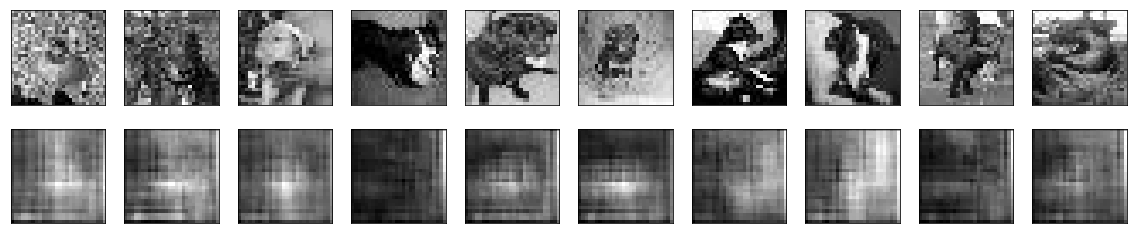

In [72]:

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import numpy as np
import mnist_reader
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
x_train, y_train = mnist_reader.load_mnist('data/mnistformat', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/mnistformat', kind='t10k')



x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [11]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 12500 samples, validate on 12500 samples
Epoch 1/50
12500/12500 [==============================] - 41s 3ms/step - loss: 0.6899 - val_loss: 0.6830
Epoch 2/50
12500/12500 [==============================] - 44s 3ms/step - loss: 0.6718 - val_loss: 0.6458
Epoch 3/50
12500/12500 [==============================] - 39s 3ms/step - loss: 0.6506 - val_loss: 0.6421
Epoch 4/50
12500/12500 [==============================] - 42s 3ms/step - loss: 0.6424 - val_loss: 0.6435
Epoch 5/50
12500/12500 [==============================] - 44s 3ms/step - loss: 0.6389 - val_loss: 0.6393
Epoch 6/50
12500/12500 [==============================] - 47s 4ms/step - loss: 0.6370 - val_loss: 0.6363
Epoch 7/50
12500/12500 [==============================] - 53s 4ms/step - loss: 0.6347 - val_loss: 0.6362
Epoch 8/50
12500/12500 [==============================] - 46s 4ms/step - loss: 0.6334 - val_loss: 0.6353
Epoch 9/50
12500/12500 [==============================] - 51s 4ms/step - loss: 0.6314 - val_loss: 0.6332
Epoch

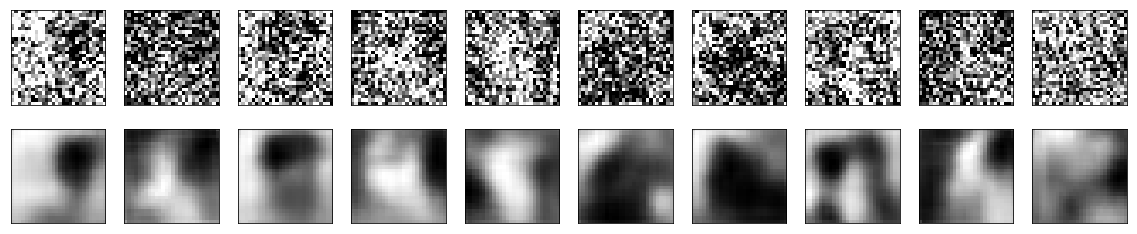

In [12]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_train_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [79]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [81]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 12500 samples, validate on 12500 samples
Epoch 1/100
12500/12500 [==============================] - 91s 7ms/step - loss: 0.6684 - val_loss: 0.6429
Epoch 2/100
12500/12500 [==============================] - 78s 6ms/step - loss: 0.6372 - val_loss: 0.6368
Epoch 3/100
12500/12500 [==============================] - 76s 6ms/step - loss: 0.6284 - val_loss: 0.6241
Epoch 4/100
12500/12500 [==============================] - 77s 6ms/step - loss: 0.6240 - val_loss: 0.6232
Epoch 5/100
12500/12500 [==============================] - 85s 7ms/step - loss: 0.6224 - val_loss: 0.6222
Epoch 6/100
12500/12500 [==============================] - 89s 7ms/step - loss: 0.6209 - val_loss: 0.6208
Epoch 7/100
12500/12500 [==============================] - 91s 7ms/step - loss: 0.6202 - val_loss: 0.6222
Epoch 8/100
12500/12500 [==============================] - 90s 7ms/step - loss: 0.6191 - val_loss: 0.6181
Epoch 9/100
12500/12500 [==============================] - 89s 7ms/step - loss: 0.6183 - val_loss: 0.6

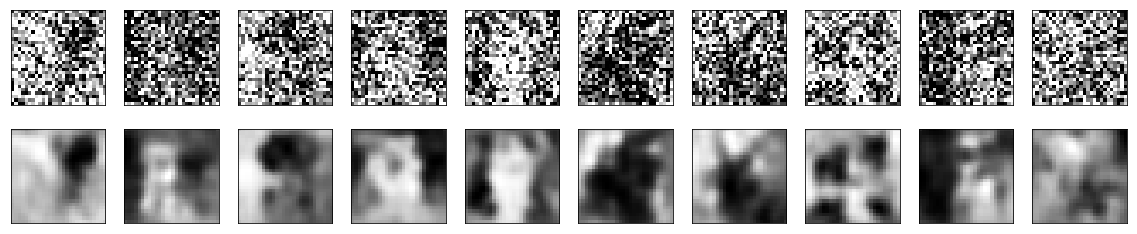

In [87]:
decoded_imgs = autoencoder.predict(x_train_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

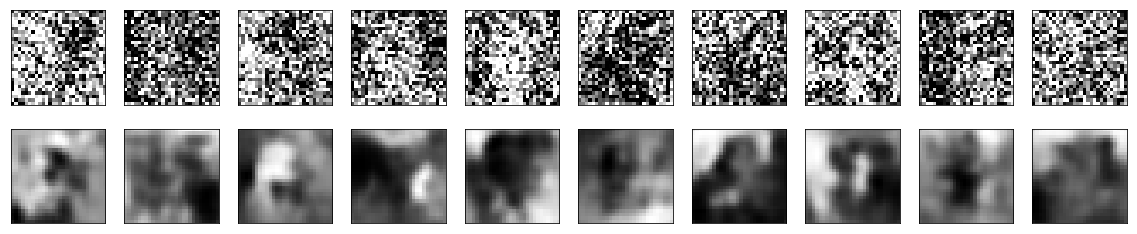

In [103]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

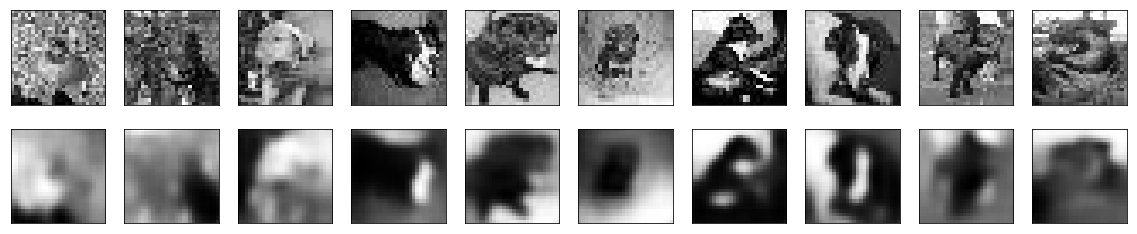

In [95]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ValueError: Invalid RGBA argument: 1

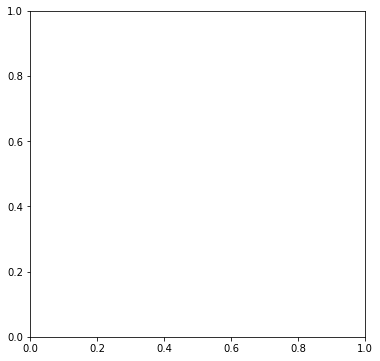

In [100]:
batch_size =50
original_dim = 784
latent_dim = 784
intermediate_dim = 512
epochs = 50
epsilon_std = 1.0


x_test_encoded = autoencoder.predict(x_test, batch_size=batch_size)
# x_test_encoded = encoder.predict(x_test_encoded, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(6, 6))
plt.imshow(figure, cmap='Greys_r')
plt.show()

ValueError: Invalid RGBA argument: 1

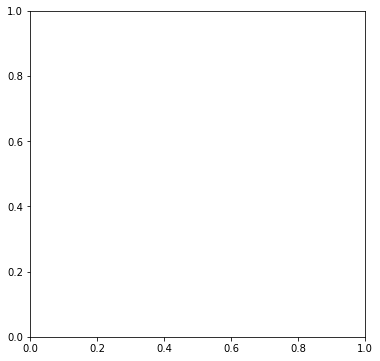

In [106]:
x_test_encoded = autoencoder.predict(x_test_noisy, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

ValueError: Invalid RGBA argument: 1

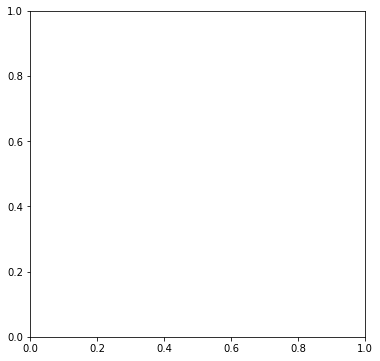

In [105]:
labels = np.random.randint(0,3, size = 10)


# sc = plt.scatter(points[:,0], points[:,1], c = labels) 
x_test_encoded = autoencoder.predict(x_train_noisy, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=labels)
plt.colorbar()
plt.show()

In [21]:
# autoencoder.fit(x_train_noisy, x_train,
#                 epochs=50,
# x_train_noisy = x_train_noisy.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train_noisy = x_train_noisy.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
        shuffle=True,
        epochs=50,
        batch_size=50,
        validation_data=(x_test, x_test))
# autoencoder.fit(x_train_noisy,
#         shuffle=True,
#         epochs=epochs,
#         batch_size=batch_size,
#         validation_data=(x_test, None))

# build a model to project inputs on the latent space
# encoder = Model(x, z_mean)
x_test_encoded = autoencoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

ValueError: Error when checking input: expected input_4 to have 4 dimensions, but got array with shape (12500, 784)

In [25]:
x_test_encoded = autoencoder.predict(x_test, batch_size=batch_size)

ValueError: Error when checking : expected input_4 to have 4 dimensions, but got array with shape (12500, 784)